Load the Various Packages that we will need


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from obspy.core import Stream, read, UTCDateTime

Now Load in the seismic data. It is in a miniseed file which contains 2 traces - one for station AFMO and one for station TST5. These stations are co-located. The traces here record both a local event (first) and then a teleseismic M 6.9 on the mid-Atlantic Ridge


2 Trace(s) in Stream:
XX.AFMO.10.BHZ | 2020-09-18T21:47:59.994536Z - 2020-09-18T22:59:59.994536Z | 40.0 Hz, 172801 samples
XX.TST5.00.BHZ | 2020-09-18T21:47:59.994539Z - 2020-09-18T22:59:59.994539Z | 40.0 Hz, 172801 samples


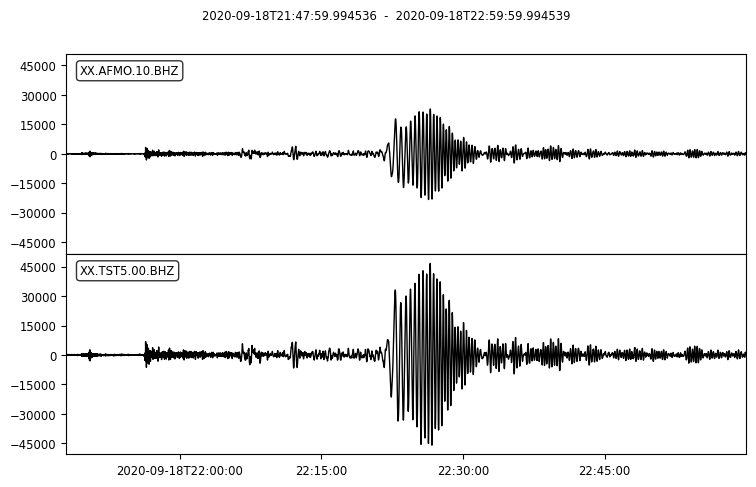

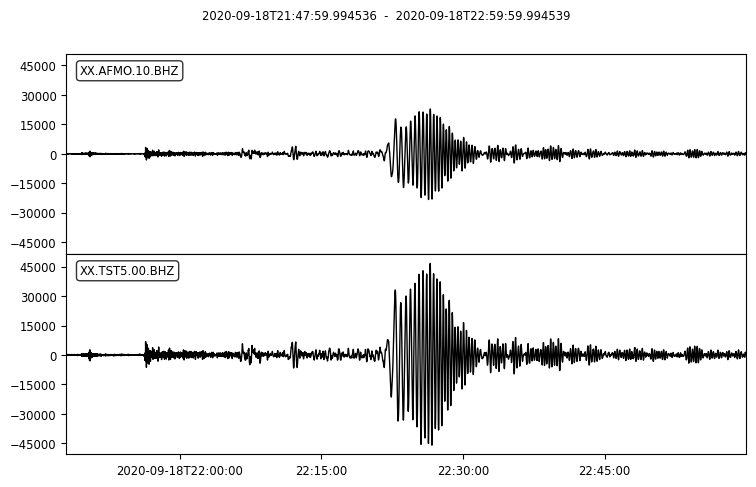

In [5]:
Data_Path = './MidAtlantic_Event.mseed'
st = read(Data_Path)
st.detrend('linear')

print(st)
st.plot()

AFMO is a Guralp CMG-3T (low gain sensor) with a 360 s response attached to a 24-bit digitizer

TST5 is a Nanometrics Trillium Compact (low gain sensor) with a 120 s response attached to a 26-bit digitizer



Below, you will need to use the Nominal Response Library (http://ds.iris.edu/NRL/) to create a Pole-Zero response for each station.
You can check if you have the correct response by plotting a local event below and comparing ground velocities (since they are co-located, you should get the same waveform on both sensors!)

Below is an example PAZ file for an STS-2 (High-Gain Sensor, 20,000 V/(m/s))

pazSTS2 = {'gain': 3.537344989*10**17,'zeros': [0., 0., -15.15, -176.6, -463.1 + 430.5j ,-463.1 - 430.5j], 'poles': [-0.037 - 0.037j,  -0.037 + 0.037j, -15.64, -97.34 - 400.7j, -97.34 + 400.7j, -374.8, -520.3, -10530 - 10050j, -10530 + 10050j, -13300, -255.097], 'sensitivity': 20000.*((2^26)/40)}

Removing AFMO response


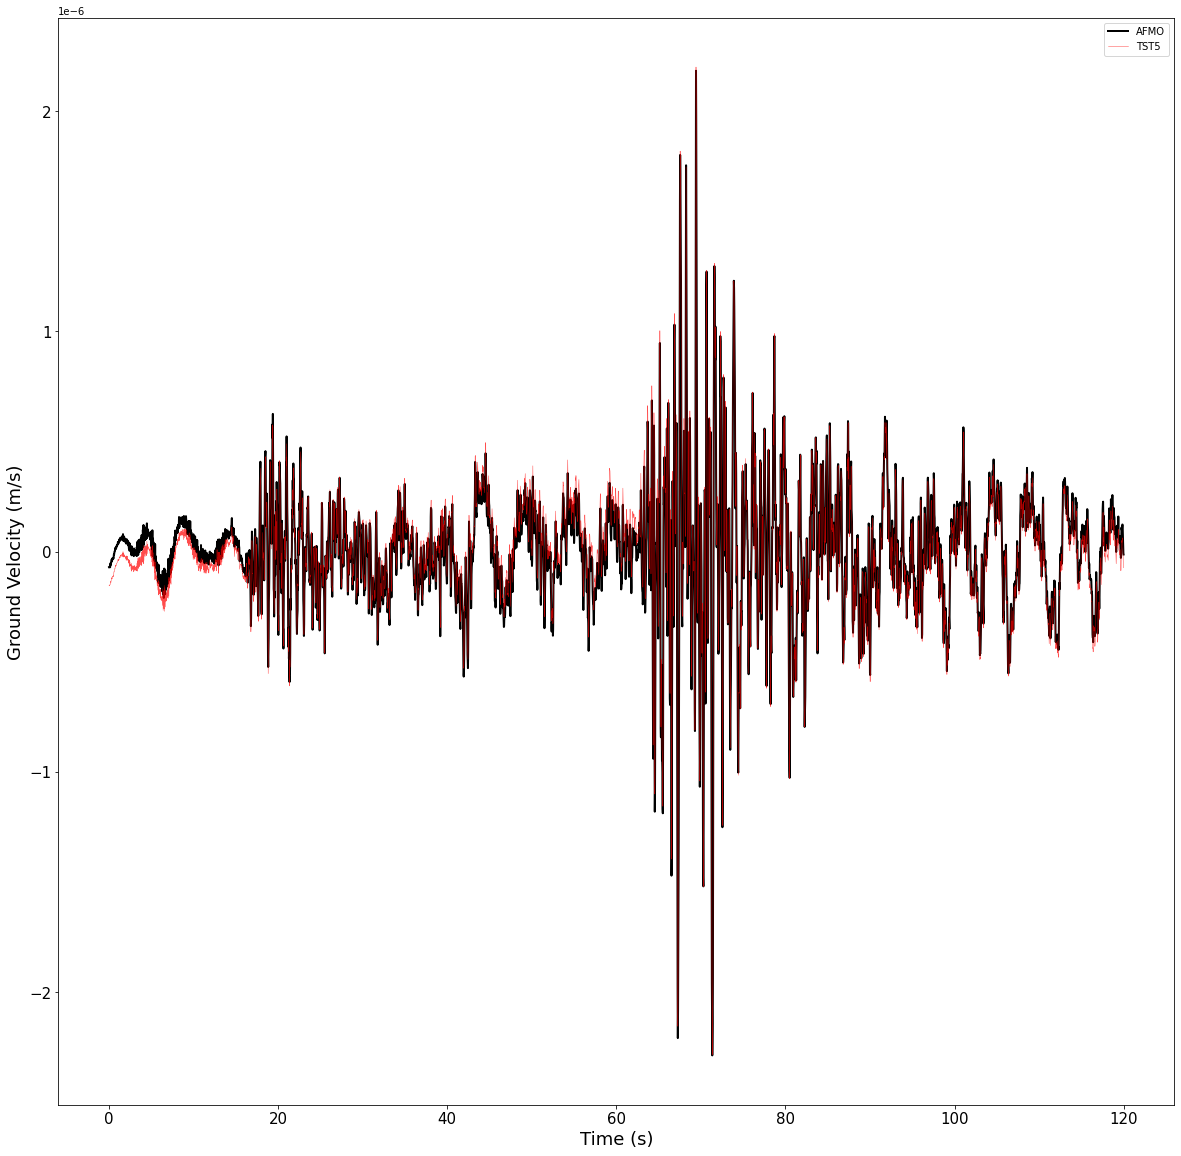

In [3]:
PAZ_AFMO = {}
PAZ_TST5 = {}

for tr in st: 
    if tr.stats.station == 'AFMO':
        tr.simulate(paz_remove=PAZ_AFMO)
    elif tr.stats.station == 'TST5':
        tr.simulate(paz_remove=PAZ_TST5)
        
        
# zoom in on local event

st_local = st.copy()
st_local.trim(st[0].stats.starttime + 80, st[0].stats.starttime + 200)
st_local.detrend('linear')

fig = plt.figure(1, figsize=(20,20))

plt.plot(st_local[0].times(),st_local[0].data,'k',linewidth=2, label=st_local[0].stats.station)
plt.plot(st_local[1].times(),st_local[1].data,'r',linewidth=0.5, alpha=0.7, label=st_local[1].stats.station)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Ground Velocity (m/s)', fontsize=18)
plt.tick_params(labelsize = 15)  
plt.legend()

Once you think you have the pole-zero responses nailed, now let's look at a M 6.9 on the mid-Atlantic Ridge. Do the waveforms looks similar? Does one sensor look off? Which sensor do you trust more and why? Why do you think one sensor looks a bit off?


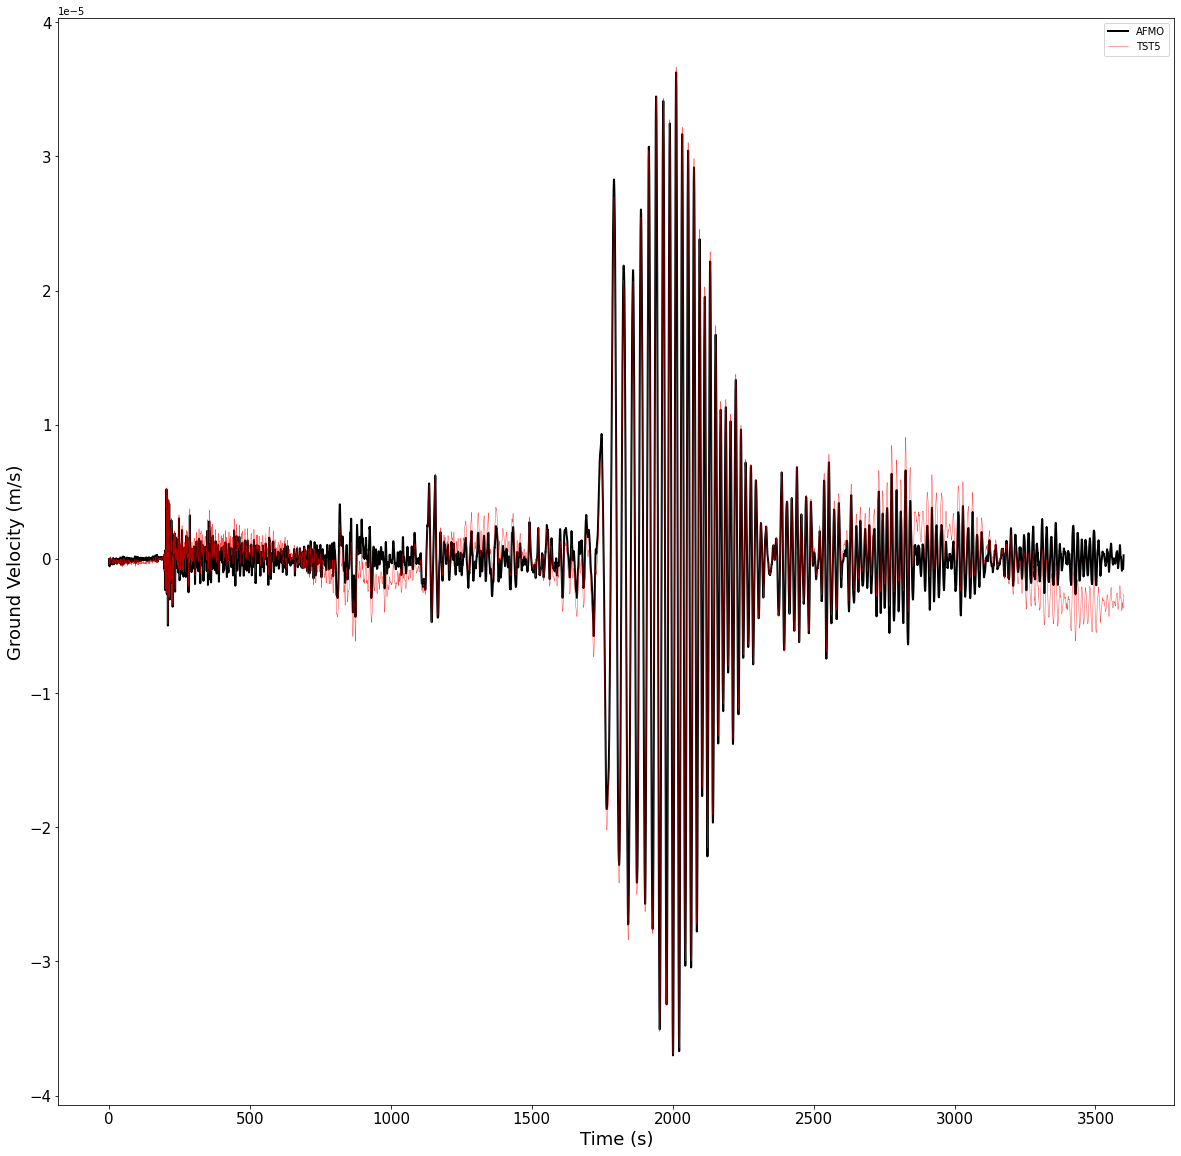

In [4]:
st_teleseism = st.copy()
st_teleseism.trim(st[0].stats.starttime + 300, st[0].stats.starttime + 3900)
st_teleseism.filter('bandpass', freqmin=.001,freqmax=10,corners=4)
st_local.detrend('linear')


fig = plt.figure(2, figsize=(20,20))

plt.plot(st_teleseism[0].times(),st_teleseism[0].data,'k',linewidth=2, label=st_teleseism[0].stats.station)
plt.plot(st_teleseism[1].times(),st_teleseism[1].data,'r',linewidth=0.5, alpha=0.7, label=st_teleseism[1].stats.station)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Ground Velocity (m/s)', fontsize=18)
plt.tick_params(labelsize = 15)  
plt.legend()
plt.show()
